<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/MPG_PCA_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load mpg-cars dataset from seaborn, keep numerical data and remove NaNs




In [2]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset("mpg") # load dataset
mpg_num = mpg.select_dtypes(include='number') # keep only numeric variables
mpg_num_nonans = mpg_num.dropna() # remove observations with NaNs

2. Apply PCA and reduce dimensionality to explain 90% of the data variance


In [3]:
X = mpg_num_nonans

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = mpg_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

varianza explicada acumulada =[ 71.58051179  83.94610315  94.35172845  96.97908694  98.72074871
  99.49585101 100.        ]


In [4]:
# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 3 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])

Dimensionalidad datos en espacio PCA reducido = (392, 3)




3. Apply GMM clustering with BIC model selection to the PCA-projected data an check how many clusters can be found


In [7]:
from sklearn import mixture
import numpy as np

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(XPCA)
    bic.append(gmm.bic(XPCA))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(XPCA)


[3842.005140182806]
[3842.005140182806, 3649.347883488259]
[3842.005140182806, 3649.347883488259, 3669.1449711978807]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407, 3624.8122786117992]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407, 3624.8122786117992, 3634.4433718507385]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407, 3624.8122786117992, 3634.4433718507385, 3693.584736349634]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407, 3624.8122786117992, 3634.4433718507385, 3693.584736349634, 3733.273079870497]
[3842.005140182806, 3649.347883488259, 3669.1449711978807, 3586.419417177685, 3609.461135855407, 3624.8122786117992, 3634.

Visualitzem l'agrupament amb un pairplot

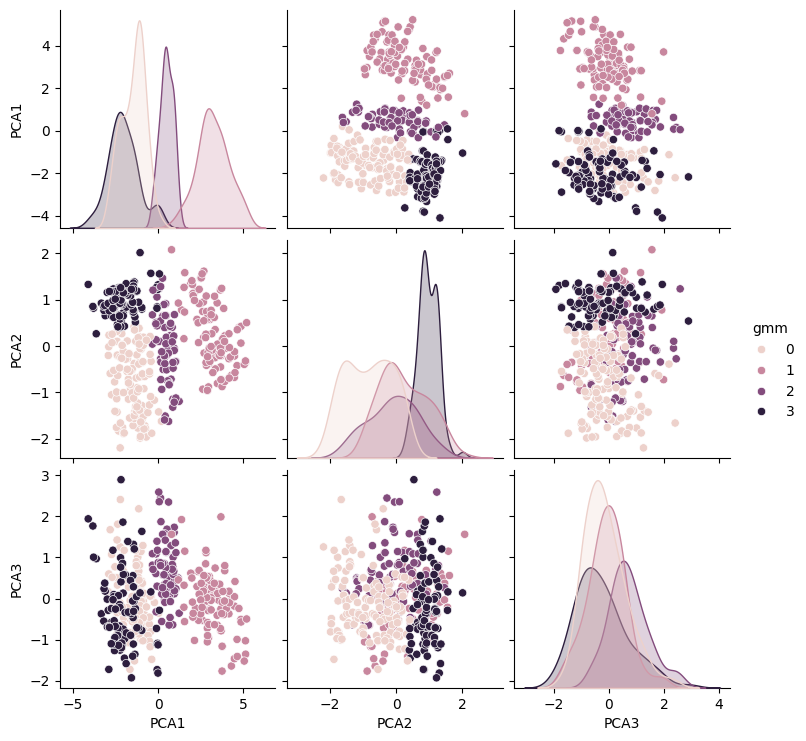

In [8]:
labels = gmm.fit_predict(XPCA)
d['gmm'] = labels
g = sns.pairplot(d, hue="gmm")